Today is the 19 Day of our Machile Learning challenge where we will write a code in order to learn Machine Learning every single day.
Today we will learn what is Regularization. What is Lasso and what is Ridge regularizations.
We will try to implement it on our own.

In [49]:
#Let's read the dataset
import pandas as pd
df = pd.read_csv("../BostonHousing.csv")

In [50]:
#Here we should predict medv
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


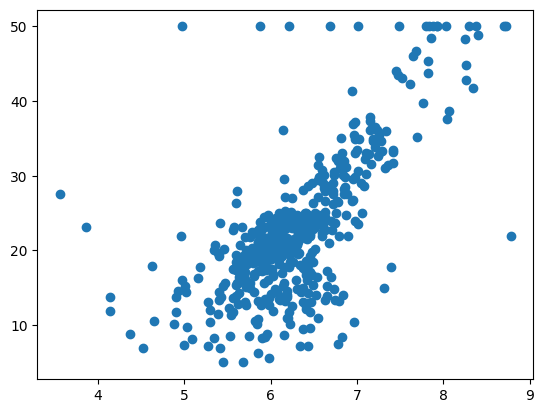

In [51]:
#Let's try to scatters for plots
import matplotlib.pyplot as plt
plt.scatter(df["rm"],df["medv"])
#Now we can see that rm and medv columns are somehow correlated to each other. We will use this in order to implement regularization

In [52]:
#LEt's predict some values and add them into our plot
#As supposed we will randomly take k and b
k = 3
b = 6
predicted = k * df["rm"] + b

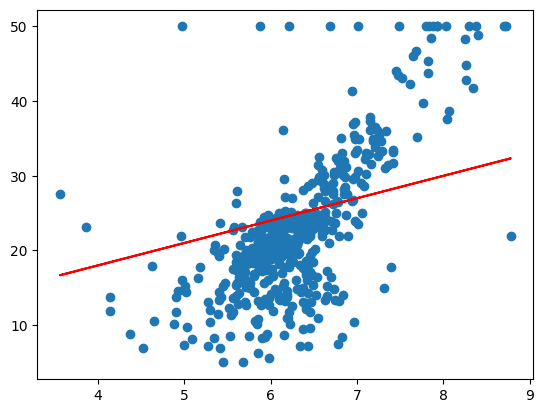

In [53]:
#Let's plot our graph
plt.scatter(df["rm"],df["medv"])
plt.plot(df["rm"],predicted, color = 'r')
#We can see thta the values which we randomly generated are not very good let's try gradient descent and some regularizations

In [54]:
mse = sum((df["medv"] - predicted)**2) / len(predicted)
mse

67.33391032213436

In [55]:
#Now let's calculate the gradients of our parameters 
gradiet_k = -2 * sum(df["rm"]  * (df["medv"] - predicted)) / len(predicted)
gradient_b = -2 * sum(df["medv"] - predicted) / len(predicted)


#Let's calculate with adding the Ridge regularization
lambda_value = 1
gradiet_k = -2 * sum(df["rm"]  * (df["medv"] - predicted)) / len(predicted) + 2 *lambda_value * k
gradient_b = -2 * sum(df["medv"] - predicted) / len(predicted)+ 2 *lambda_value * k

In [56]:
#Let's define new k
learning_rate = 0.0001
k = k - learning_rate * gradiet_k
b = b - learning_rate * gradient_b
k,b

(2.9970838469798418, 5.9989357806324115)

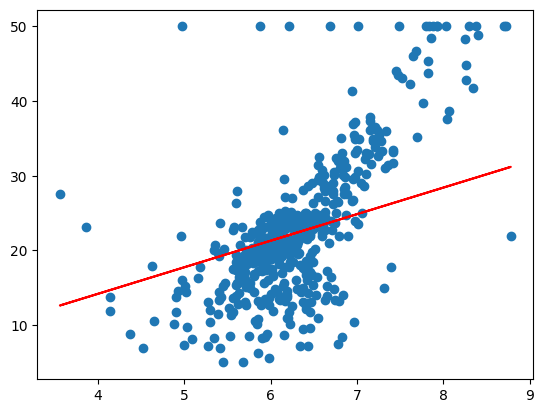

In [57]:
#Now Let's iterate it 
import time
from IPython.display import clear_output
learning_rate = 0.01
for i in range(100):
    gradiet_k = -2 * sum(df["rm"]  * (df["medv"] - predicted)) / len(predicted) + 2 *lambda_value * k
    gradient_b = -2 * sum(df["medv"] - predicted) / len(predicted)+ 2 *lambda_value * k
    k = k - learning_rate * gradiet_k
    b = b - learning_rate * gradient_b
    predicted = k * df["rm"] + b
    plt.scatter(df["rm"], df["medv"])
    plt.plot(df["rm"], predicted, color='r')
    plt.show()
    clear_output(wait=True)
    time.sleep(1)